In [22]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris  #载入鸢尾花数据
import matplotlib.pyplot as plt
%matplotlib inline

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     label  
0        0  
1

<AxesSubplot:>

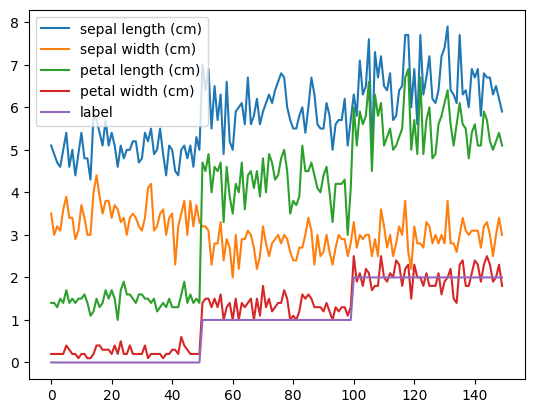

In [23]:
#载入数据并转为df格式
iris = load_iris()
iris.data
iris_df = pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df['label'] = iris.target
print(iris_df)
iris_df.plot()

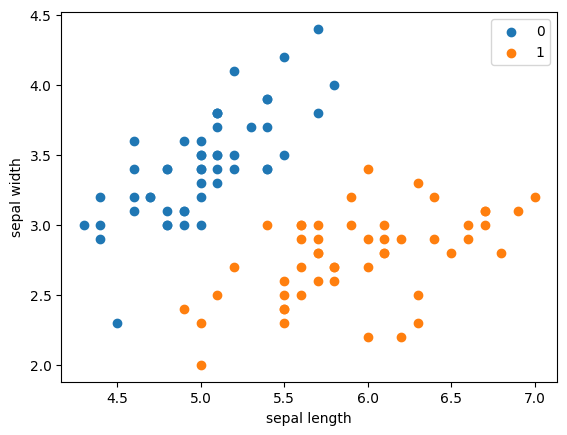

In [24]:
#数据标签规整
iris_df.columns = ['sepal length','sepal width', 'petal length', 'petal width', 'label']
iris_df['label'].value_counts()

#check 是否线性可分
plt.scatter(iris_df[:50]['sepal length'],iris_df[:50]['sepal width'],label='0')
plt.scatter(iris_df[50:100]['sepal length'],iris_df[50:100]['sepal width'],label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [15]:
#X=(x1_i,x2_i) Y=yi;  T={(X,Y)}
#二分类问题

# data = np.array(iris_df.loc[:99,['sepal length','sepal width','label']]) 
# iloc是左闭右开，loc是左右都闭
#取前100条数据（两类花）,取两个特征
data = np.array(iris_df.iloc[:100, [0, 1, -1]])
X,y = data[:,:-1],data[:,-1]
print(data[:5])
print(X)

#将‘类标签’转为‘感知器算法中的正负项’
y = np.array([1 if i == 1 else -1 for i in y])
print(y)


[[5.1 3.5 0. ]
 [4.9 3.  0. ]
 [4.7 3.2 0. ]
 [4.6 3.1 0. ]
 [5.  3.6 0. ]]
[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]


In [16]:
#test_code




In [1]:
# 数据线性可分，二分类数据
# 感知器模型：Y = sign( w .* X  + b )
# 损失函数： L(w,b) = -sum（yi ( w .* xi + b )) ------误分类点（xi,yi）
# SGD优化：arg min( L(w,b) )
#          Lw =  sum( lr * xi*yi )
#          Lb = sum( lr * yi )

class Model:
    def __init__(self):
        self.w = np.ones(len(data[0])-1,dtype=np.float32)
        self.b = 0 #初始化w,b的值
        self.lr = 0.5
        self.dot_n = {}
    def sign(self, x, w, b):
        y = np.dot(x, w) + b #求w,b的值
        '''
            Numpy中dot()函数主要功能有两个：向量点积和矩阵乘法。
            格式：x.dot(y) 等价于 np.dot(x,y) ----
        --其中，x是m*n 矩阵 ，y是n*m矩阵，则x.dot(y) 得到m*m矩阵
        '''
        return y
        
    # SGD 随机梯度下降法    
    def fit(self, X_train, y_train):
        is_wrong = False
        loop_first = True
        #误分类点的意思就是开始的时候，超平面并没有正确划分，做了错误分类的数据
        k=0
        while not is_wrong:
            k = k+1
            if loop_first:
                loop_first=False
                self.dot_n = {(d+1):0 for d in range(len(X_train))}
            wrong_count = 0 #误分类为0，就不用循环，得到w,b
            for d in range(len(X_train)):
                X = X_train[d]
                y = y_train[d]
                if y * self.sign(X, self.w, self.b) < 0:
                    self.w = self.w + self.lr*np.dot(X,y)
                    self.b = self.b + self.lr*y
                    wrong_count += 1
                    for key in self.dot_n.keys():
                        if key == int(f"{d+1}"):
                            self.dot_n[key] += 1
                    print(f"第{k}轮迭i代：误分类点为{d+1}  w = {self.w} b = {self.b}")
            
            if wrong_count == 0:
                is_wrong = True
        return 'Perceptron Model'
    def score(self):
        pass
    
    

In [42]:
perceptron = Model()
perceptron.fit(X,y)
print(perceptron.dot_n)

第1轮迭i代：误分类点为1  w = [-1.55 -0.75] b = -0.5
第1轮迭i代：误分类点为51  w = [1.95 0.85] b = 0.0
第2轮迭i代：误分类点为1  w = [-0.6 -0.9] b = -0.5
第2轮迭i代：误分类点为51  w = [2.9 0.7] b = 0.0
第3轮迭i代：误分类点为1  w = [ 0.35 -1.05] b = -0.5
第3轮迭i代：误分类点为51  w = [3.85 0.55] b = 0.0
第4轮迭i代：误分类点为1  w = [ 1.3 -1.2] b = -0.5
第4轮迭i代：误分类点为2  w = [-1.15 -2.7 ] b = -1.0
第4轮迭i代：误分类点为51  w = [ 2.35 -1.1 ] b = -0.5
第5轮迭i代：误分类点为1  w = [-0.2  -2.85] b = -1.0
第5轮迭i代：误分类点为51  w = [ 3.3  -1.25] b = -0.5
第6轮迭i代：误分类点为1  w = [ 0.75 -3.  ] b = -1.0
第6轮迭i代：误分类点为51  w = [ 4.25 -1.4 ] b = -0.5
第7轮迭i代：误分类点为1  w = [ 1.7  -3.15] b = -1.0
第7轮迭i代：误分类点为52  w = [ 4.9  -1.55] b = -0.5
第8轮迭i代：误分类点为1  w = [ 2.35 -3.3 ] b = -1.0
第8轮迭i代：误分类点为2  w = [-0.1 -4.8] b = -1.5
第8轮迭i代：误分类点为51  w = [ 3.4 -3.2] b = -1.0
第9轮迭i代：误分类点为1  w = [ 0.85 -4.95] b = -1.5
第9轮迭i代：误分类点为51  w = [ 4.35 -3.35] b = -1.0
第10轮迭i代：误分类点为1  w = [ 1.8 -5.1] b = -1.5
第10轮迭i代：误分类点为51  w = [ 5.3 -3.5] b = -1.0
第11轮迭i代：误分类点为1  w = [ 2.75 -5.25] b = -1.5
第11轮迭i代：误分类点为52  w = [ 5.95 -3.65] b = -1.0


第551轮迭i代：误分类点为21  w = [ 36.05 -47.35] b = -54.5
第551轮迭i代：误分类点为85  w = [ 38.75 -45.85] b = -54.0
第552轮迭i代：误分类点为26  w = [ 36.25 -47.35] b = -54.5
第552轮迭i代：误分类点为85  w = [ 38.95 -45.85] b = -54.0
第553轮迭i代：误分类点为21  w = [ 36.25 -47.55] b = -54.5
第553轮迭i代：误分类点为85  w = [ 38.95 -46.05] b = -54.0
第554轮迭i代：误分类点为26  w = [ 36.45 -47.55] b = -54.5
第554轮迭i代：误分类点为42  w = [ 34.2 -48.7] b = -55.0
第554轮迭i代：误分类点为57  w = [ 37.35 -47.05] b = -54.5
第555轮迭i代：误分类点为42  w = [ 35.1 -48.2] b = -55.0
第555轮迭i代：误分类点为60  w = [ 37.7  -46.85] b = -54.5
第556轮迭i代：误分类点为42  w = [ 35.45 -48.  ] b = -55.0
第556轮迭i代：误分类点为60  w = [ 38.05 -46.65] b = -54.5
第557轮迭i代：误分类点为42  w = [ 35.8 -47.8] b = -55.0
第557轮迭i代：误分类点为85  w = [ 38.5 -46.3] b = -54.5
第558轮迭i代：误分类点为42  w = [ 36.25 -47.45] b = -55.0
第558轮迭i代：误分类点为85  w = [ 38.95 -45.95] b = -54.5
第559轮迭i代：误分类点为26  w = [ 36.45 -47.45] b = -55.0
第559轮迭i代：误分类点为85  w = [ 39.15 -45.95] b = -54.5
第560轮迭i代：误分类点为21  w = [ 36.45 -47.65] b = -55.0
第560轮迭i代：误分类点为85  w = [ 39.15 -46.15] b = -54.5


[ 39.15 -50.1 ]


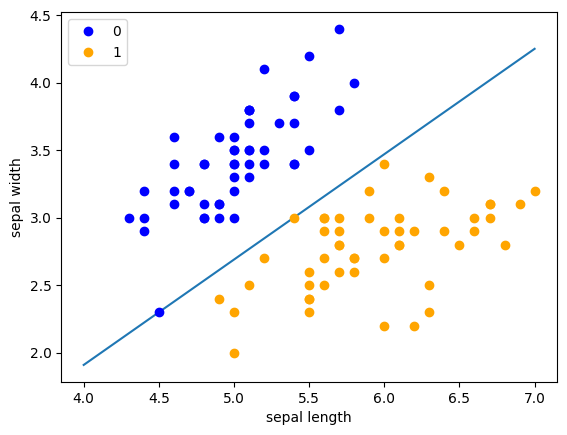

In [44]:
#数据可视化
x_points = np.linspace(4,7,10)
print(perceptron.w)
y_last = -(perceptron.w[0]*x_points + perceptron.b)/perceptron.w[1]
plt.plot(x_points,y_last)
plt.plot(data[:50, 0], data[:50, 1],'o', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'o', color='orange', label='1')

plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()


[ 70.7 -87.9] [-117.]


'\n图中，有一个蓝点和一个红点没有被正确分类，\n因为 SKlearn 的 Perceptron 实例中有一个tol参数，\ntol 参数规定了如果本次迭代的损失和上次迭代的损失之差小于一个特定值时，停止迭代。\n所以要设置 tol=None\n'

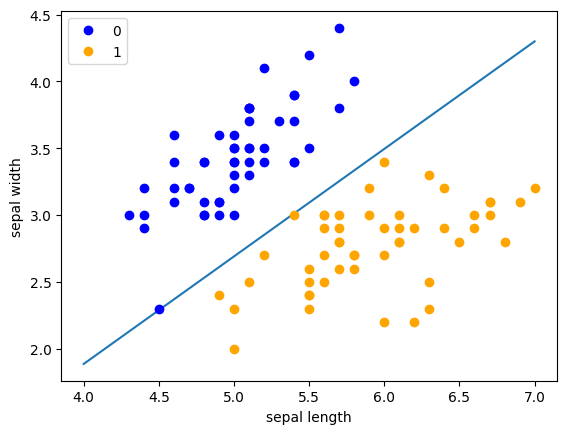

In [38]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron(fit_intercept=True, max_iter=100000, shuffle=True,eta0=1,tol=None)
perceptron.fit(X, y)  # 默认学习率为1
w = perceptron.coef_[0]  # ,注意输出的是二维数组，加上[0]后， w=[ 23.2 -38.7]
b = perceptron.intercept_  # b=-5
print(w,b)

#数据可视化
y_2 = -(w[0]*x_points + b)/w[1]
plt.plot(x_points, y_2)
plt.plot(data[:50, 0], data[:50, 1], 'o', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'o', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

'''
图中，有一个蓝点和一个红点没有被正确分类，
因为 SKlearn 的 Perceptron 实例中有一个tol参数，
tol 参数规定了如果本次迭代的损失和上次迭代的损失之差小于一个特定值时，停止迭代。
所以要设置 tol=None
'''


In [37]:
#字典修改value值逻辑
d=1
a = {1: 1, 2: 1, 3: 1}
for key in a.keys():
    print(key)
    if key == int(f"{d}"):
        a[key] += 1
print(a)

1
2
3
{1: 2, 2: 1, 3: 1}


In [ ]:
# 感知器的对偶形式
class Model_2:
    def 

